TASK 1 : POPULATION & SAMPLING

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin-1')

# Display basic information
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Treat full dataset as Population
population = df.copy()
print("Population Size:", len(population))

Population Size: 9994


In [ ]:
# Simple Random Sampling
sample = population.sample(n=500, random_state=42)
print("Sample Size:", len(sample))

Sample Size: 500


TASK 2 : SAMPLING TECHNIQUES

In [ ]:
# Random Sample
random_sample = population.sample(n=500, random_state=42)

In [ ]:
# Systematic Sample
n = 500
step = len(population) // n
systematic_sample = population.iloc[::step][:n]

In [ ]:
# Compare Means
print("Population Sales Mean:", population["Sales"].mean())
print("Random Sample Sales Mean:", random_sample["Sales"].mean())
print("Systematic Sample Sales Mean:", systematic_sample["Sales"].mean())

Population Sales Mean: 229.85800083049833
Random Sample Sales Mean: 224.14023900000007
Systematic Sample Sales Mean: 215.72915560000004


Differences (Short Note):

* Population mean is the true average of all data.

* Sample means are close but not exactly the same due to        sampling variability.

* Random vs. systematic sampling can yield slightly different   means depending on data ordering.

TASK 3 : CENTRAL LIMIT THEOREM (CLT)

In [ ]:
import numpy as np

sample_means = []
for i in range(1000):
    sample_i = population["Sales"].sample(n=30)
    sample_means.append(sample_i.mean())

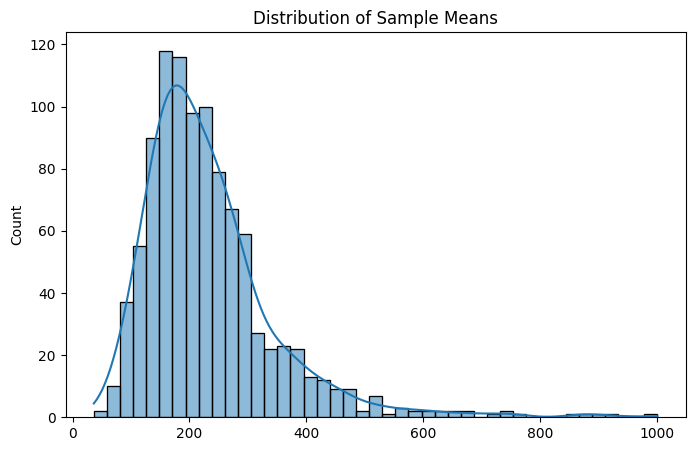

In [ ]:
# Plot Distribution of Sample Means
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means")
plt.show()


Observation:

The distribution of sample means forms a bell curve (normal shape) regardless of the original distribution — this is the CLT in action

TASK 4 : NORMAL DISTRIBUTION ANALYSIS

Mean: 229.85800083049833
Standard Deviation: 623.2451005086818


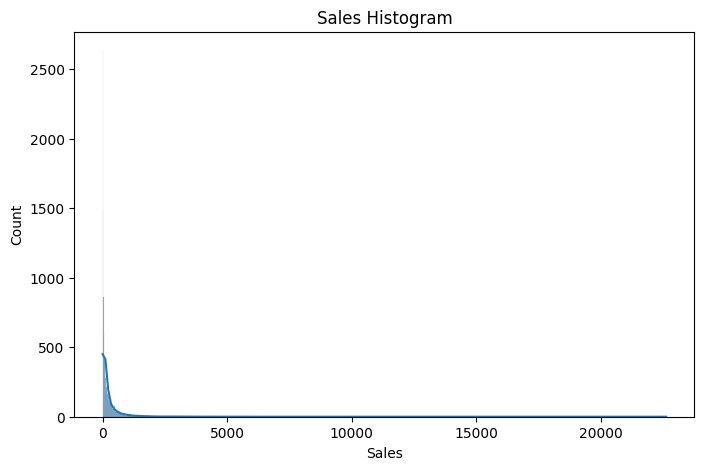

In [ ]:
num_col = population["Sales"]
mean_val = num_col.mean()
std_val = num_col.std()

print("Mean:", mean_val)
print("Standard Deviation:", std_val)

plt.figure(figsize=(8, 5))
sns.histplot(num_col, kde=True)
plt.title("Sales Histogram")
plt.show()


In [ ]:
within_1 = num_col[(num_col >= mean_val - std_val) & (num_col <= mean_val + std_val)]
within_2 = num_col[(num_col >= mean_val - 2*std_val) & (num_col <= mean_val + 2*std_val)]
within_3 = num_col[(num_col >= mean_val - 3*std_val) & (num_col <= mean_val + 3*std_val)]

print("% within 1 SD:", len(within_1) / len(num_col) * 100)
print("% within 2 SD:", len(within_2) / len(num_col) * 100)
print("% within 3 SD:", len(within_3) / len(num_col) * 100)


% within 1 SD: 93.9763858314989
% within 2 SD: 97.52851711026615
% within 3 SD: 98.72923754252551


TASK 5 : Z-SCORE CALCULATION

In [ ]:
population["Z_Score"] = (population["Sales"] - mean_val) / std_val

outliers = population[(population["Z_Score"] > 3) | (population["Z_Score"] < -3)]
print("Outliers:", outliers.shape[0])
outliers.head()

Outliers: 127


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Z_Score
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,4.578571
165,166,CA-2014-139892,9/8/2014,9/12/2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920,12.723877
251,252,CA-2016-145625,9/11/2016,9/17/2016,Standard Class,KC-16540,Kelly Collister,Consumer,United States,San Diego,...,West,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,3347.370,13,0.0,636.0003,5.002064
262,263,US-2014-106992,9/19/2014,9/21/2014,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,...,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,3059.982,3,0.4,-509.9970,4.540949
263,264,US-2014-106992,9/19/2014,9/21/2014,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,...,Central,TEC-MA-10003353,Technology,Machines,Xerox WorkCentre 6505DN Laser Multifunction Pr...,2519.958,7,0.4,-251.9958,3.674477


TASK 6 : BUSINESS INSIGHTS




Q. Why is sampling required

-> Sampling allows us to make estimates of a large dataset without processing the entire population, saving time and resources.

Q. How does CLT help?

-> CLT says that the distribution of sample means will be approximately normal if the sample size is large enough. This lets us make inferential statistics.

Q. Why is normal distribution important before hypothesis testing?

-> Many statistical tests assume normality so that the results are valid and accurate.

Q. How does Z-Score help?

-> Z-score measures how far a data point is from the mean, enabling us to spot unusual (outlier) values.